## Problems

* Dataset only contains songs that are on top charts for 1 or more days; most songs never reach top charts, but not accounted for in dataset/model
* Vast majority of songs are on top charts for <=100 days


## Setup

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('TopCharts_merged.csv', index_col = 0)
#dataset
data.head()

,Artist,Title,Id,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness,Days,Artist Id,Artist Followers,Artist Popularity,Artist Genres
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,4,159.801,5,0,0.129,0.585,0.520,0.1240,0.000070,116,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,4,143.950,8,0,0.291,0.556,0.538,0.0689,0.000000,756,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,4,180.064,4,1,0.381,0.664,0.667,0.6400,0.000001,496,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,4,123.146,6,1,0.492,0.630,0.804,0.2150,0.000000,702,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,4,81.967,5,1,0.127,0.665,0.498,0.2280,0.000000,178,246dkjvS1zLTtiykXe5h60,22726049.0,98.0,rap


In [3]:
df = data.copy()

## Convert categorical variables

In [4]:
df["Days_factor"] = np.zeros(len(df))

In [5]:
days_dict = {0: "<7", 1:"<30", 2: "<90", 3:"<365", 4:"365+"}

In [6]:
df.loc[(df.Days >= 7) & (df.Days < 30), "Days_factor"] = 1
df.loc[(df.Days >= 30) & (df.Days < 90), "Days_factor"] = 2
df.loc[(df.Days >= 90) & (df.Days < 365), "Days_factor"] = 3
df.loc[df.Days >= 365, "Days_factor"] = 4

In [7]:
assert len(df[df.Days < 7]) == len(df[df.Days_factor == 0])
assert len(df[(df.Days >= 7) & (df.Days < 30)]) == len(df[df.Days_factor == 1])
assert len(df[(df.Days >= 30) & (df.Days < 90)]) == len(df[df.Days_factor == 2])
assert len(df[(df.Days >= 90) & (df.Days < 365)]) == len(df[df.Days_factor == 3])


In [8]:
categorical = ["Key", "Mode"]

In [9]:
df_dummy = df.copy()
for c in categorical:
    dummy = pd.get_dummies(df[c], prefix = c)
    df_dummy = pd.concat([df_dummy, dummy], axis = 1)    
df_dummy.drop(columns = categorical, inplace = True)

In [11]:
df_dummy.columns

Index(['Artist', 'Title', 'Id', 'Time Signature', 'Tempo', 'Valence',
       'Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Days',
       'Artist Id', 'Artist Followers', 'Artist Popularity', 'Artist Genres',
       'Days_factor', 'Key_0', 'Key_1', 'Key_2', 'Key_3', 'Key_4', 'Key_5',
       'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10', 'Key_11', 'Mode_0',
       'Mode_1'],
      dtype='object')

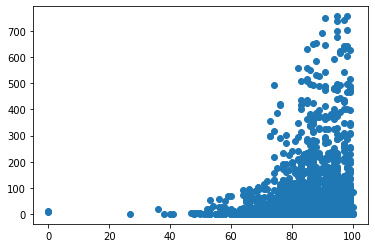

In [53]:
plt.scatter(df_dummy["Artist Popularity"], df_dummy["Days"])

In [15]:
drop = ["Artist", "Id", "Title", "Artist Id", "Artist Genres", "Time Signature", "Artist Followers", "Artist Popularity", "Days"]

In [16]:
df1 = df_dummy.drop(columns = drop)

In [17]:
df1.columns

Index(['Tempo', 'Valence', 'Danceability', 'Energy', 'Acousticness',
       'Instrumentalness', 'Days_factor', 'Key_0', 'Key_1', 'Key_2', 'Key_3',
       'Key_4', 'Key_5', 'Key_6', 'Key_7', 'Key_8', 'Key_9', 'Key_10',
       'Key_11', 'Mode_0', 'Mode_1'],
      dtype='object')

In [18]:
y = df["Days_factor"]

In [19]:
counts = df["Days_factor"].value_counts()

In [20]:
X = df1.drop(columns = "Days_factor")

In [21]:
X.head()

,Tempo,Valence,Danceability,Energy,Acousticness,Instrumentalness,Key_0,Key_1,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,Mode_0,Mode_1
0,159.801,0.129,0.585,0.520,0.1240,0.000070,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,143.950,0.291,0.556,0.538,0.0689,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,180.064,0.381,0.664,0.667,0.6400,0.000001,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,123.146,0.492,0.630,0.804,0.2150,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,81.967,0.127,0.665,0.498,0.2280,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Split train/test data

In [28]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split 

In [31]:
imbX_train, X_test, imby_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train, y_train = RandomOverSampler().fit_sample(imbX_train, imby_train)

## Functions to evaluate model

__BASELINE__

In [33]:
counts/sum(counts)

0.0    0.478286
1.0    0.243078
2.0    0.142816
3.0    0.111046
4.0    0.024774
Name: Days_factor, dtype: float64

In [34]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [36]:
def plotCM(fitted_model, X_test = X_test, y_test = y_test):
    """
    plots confusion matrix for given model
    """
    disp = plot_confusion_matrix(fitted_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize="true")
    disp.ax_.set_title("Normalized confusion matrix")

    print("Normalized confusion matrix")
    print(disp.confusion_matrix)
    
    
    acc = metrics.accuracy_score(y_test, fitted_model.predict(X_test))
    print(f"Accuracy: {acc}")


## Models

In [37]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

Normalized confusion matrix
[[0.25443787 0.11242604 0.13905325 0.23668639 0.25739645]
 [0.21472393 0.11656442 0.14723926 0.25766871 0.26380368]
 [0.10891089 0.12871287 0.26732673 0.23762376 0.25742574]
 [0.16438356 0.09589041 0.15068493 0.30136986 0.28767123]
 [0.08333333 0.08333333 0.08333333 0.25       0.5       ]]
Accuracy: 0.2328966521106259


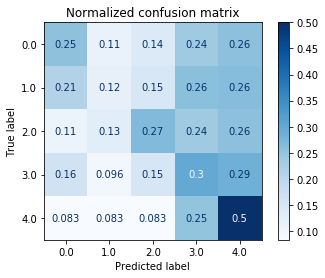

In [41]:
imb_brf = BalancedRandomForestClassifier().fit(imbX_train, imby_train)
plotCM(imb_brf)

Normalized confusion matrix
[[0.68934911 0.18639053 0.04142012 0.07692308 0.00591716]
 [0.63190184 0.20245399 0.06748466 0.08588957 0.01226994]
 [0.57425743 0.21782178 0.12871287 0.05940594 0.01980198]
 [0.54794521 0.23287671 0.08219178 0.12328767 0.01369863]
 [0.41666667 0.5        0.08333333 0.         0.        ]]
Accuracy: 0.4192139737991266


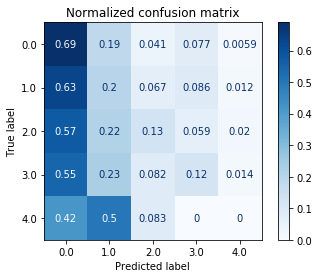

In [42]:
brf = BalancedRandomForestClassifier().fit(X_train, y_train)
plotCM(brf)

Normalized confusion matrix
[[0.25147929 0.12721893 0.13609467 0.16272189 0.32248521]
 [0.19631902 0.09815951 0.15337423 0.17791411 0.37423313]
 [0.11881188 0.11881188 0.18811881 0.17821782 0.3960396 ]
 [0.1369863  0.10958904 0.1369863  0.20547945 0.4109589 ]
 [0.08333333 0.         0.25       0.08333333 0.58333333]]
Accuracy: 0.2066957787481805


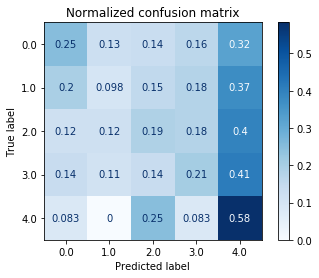

In [44]:
imb_ec = EasyEnsembleClassifier().fit(imbX_train, imby_train)
plotCM(imb_ec)

Normalized confusion matrix
[[0.31656805 0.12130178 0.13609467 0.24852071 0.17751479]
 [0.26380368 0.09815951 0.15337423 0.26993865 0.21472393]
 [0.16831683 0.15841584 0.1980198  0.22772277 0.24752475]
 [0.20547945 0.09589041 0.19178082 0.26027397 0.24657534]
 [0.16666667 0.16666667 0.08333333 0.08333333 0.5       ]]
Accuracy: 0.2445414847161572


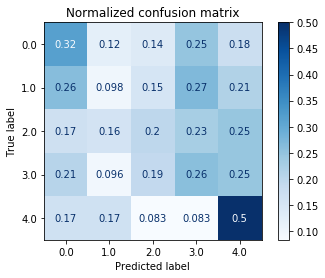

In [45]:
ec = EasyEnsembleClassifier().fit(X_train, y_train)
plotCM(ec)

In [47]:
from sklearn.ensemble import RandomForestClassifier

Normalized confusion matrix
[[0.8816568  0.09171598 0.01183432 0.0147929  0.        ]
 [0.80981595 0.13496933 0.01840491 0.03067485 0.00613497]
 [0.74257426 0.14851485 0.07920792 0.02970297 0.        ]
 [0.79452055 0.12328767 0.05479452 0.01369863 0.01369863]
 [0.83333333 0.16666667 0.         0.         0.        ]]
Accuracy: 0.47889374090247455


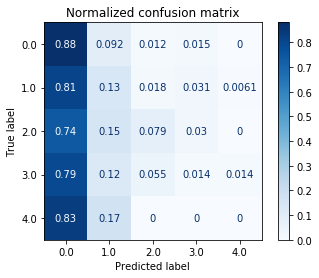

In [48]:
imb_rf = RandomForestClassifier(n_jobs = -1).fit(imbX_train, imby_train)
plotCM(imb_rf)

Normalized confusion matrix
[[0.73964497 0.15680473 0.04142012 0.05621302 0.00591716]
 [0.66257669 0.19631902 0.06134969 0.06748466 0.01226994]
 [0.6039604  0.20792079 0.11881188 0.05940594 0.00990099]
 [0.50684932 0.26027397 0.12328767 0.09589041 0.01369863]
 [0.58333333 0.25       0.08333333 0.08333333 0.        ]]
Accuracy: 0.438136826783115


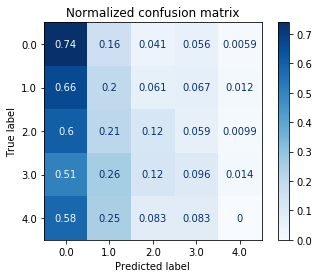

In [49]:
rf = RandomForestClassifier(n_jobs = -1).fit(X_train, y_train)
plotCM(rf)

Normalized confusion matrix
[[0.78698225 0.13609467 0.03254438 0.0443787  0.        ]
 [0.72392638 0.20245399 0.03680982 0.03067485 0.00613497]
 [0.69306931 0.20792079 0.04950495 0.04950495 0.        ]
 [0.69863014 0.17808219 0.05479452 0.05479452 0.01369863]
 [0.58333333 0.33333333 0.         0.08333333 0.        ]]
Accuracy: 0.4483260553129549


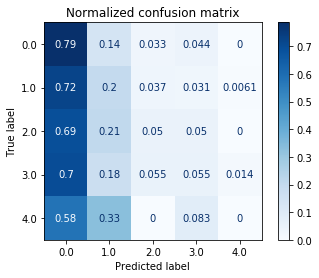

In [50]:
from xgboost import XGBClassifier
imb_xgb = XGBClassifier().fit(imbX_train, imby_train)
plotCM(imb_xgb)

Normalized confusion matrix
[[0.60946746 0.20118343 0.10650888 0.07692308 0.00591716]
 [0.53374233 0.22699387 0.11656442 0.09815951 0.02453988]
 [0.47524752 0.28712871 0.0990099  0.12871287 0.00990099]
 [0.50684932 0.23287671 0.15068493 0.09589041 0.01369863]
 [0.41666667 0.5        0.         0.08333333 0.        ]]
Accuracy: 0.3784570596797671


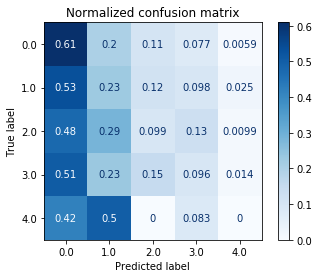

In [51]:
xgb = XGBClassifier().fit(X_train, y_train)
plotCM(xgb)